In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('data/poultry_weight_15_08_2023.csv')
df_lot_info = pd.read_csv('data/lot_info_15_ago_2023.csv')
df

,reference_date,holding_uuid,farm_uuid,animal_group_uuid,animal_group_age,total_measurement_weight,total_animal_measurement,balance_animals_stock_accumulated
0,2021-02-10,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,3,0.101,1,19600
1,2021-02-13,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,6,0.176,1,19600
2,2021-02-20,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,13,0.454,1,19600
3,2021-02-27,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,20,0.879,1,19600
4,2021-03-06,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,27,1.451,1,19600
...,...,...,...,...,...,...,...,...
131650,2022-05-13,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,14,0.330,1,30400
131651,2022-05-27,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,28,1.300,1,30400
131652,2022-05-30,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,31,1.550,1,30400
131653,2022-06-02,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,34,1.840,1,30400


In [5]:
# contar quantos animal_goups_uuid unicos existem
df['animal_group_uuid'].nunique()

18960

In [4]:
# contar valores totais de animal_group_uuid
df['animal_group_uuid'].count()

131655

In [15]:
# saber quantas entradas existem para cada animal_group_uuid
df['animal_group_uuid'].value_counts()

animal_group_uuid
2d77372e-4dc0-421a-a756-afbc91b4b0fa    47
cf78def5-0ec1-49dc-bdb7-e7ba619b8928    46
ebde6019-086f-4eda-b52b-a985da58a8d6    45
3150a71c-f713-46b7-88f1-5ab72ffad7a9    44
20f0ba42-da77-4e47-91af-4fe547ca1bc1    44
                                        ..
34950790-f47f-4807-8875-921afa273e2e     1
a02144b1-4849-4d66-a301-e7f52a591f6a     1
223d6766-b79f-4f84-933c-0d3257b9af5c     1
6e5d0b35-a418-46dc-8416-86b058248108     1
f3fc8f1a-0b43-46aa-84e7-5a05fa4f7ef6     1
Name: count, Length: 18960, dtype: int64

In [7]:
# Salvar em novo dataframe apenas os animais que possuem uma quantidade maior que o numero 30 em numeor de repetição
df_animal_group_uuid = df['animal_group_uuid'].value_counts()
df_animal_group_uuid = df_animal_group_uuid[df_animal_group_uuid > 29]
df_animal_group_uuid = df_animal_group_uuid.reset_index()
df_animal_group_uuid.columns = ['animal_group_uuid', 'count']
df_animal_group_uuid

,animal_group_uuid,count
0,2d77372e-4dc0-421a-a756-afbc91b4b0fa,47
1,cf78def5-0ec1-49dc-bdb7-e7ba619b8928,46
2,ebde6019-086f-4eda-b52b-a985da58a8d6,45
3,3150a71c-f713-46b7-88f1-5ab72ffad7a9,44
4,20f0ba42-da77-4e47-91af-4fe547ca1bc1,44
...,...,...
69,6eadec84-877f-418c-9a74-d3f176215ab9,31
70,10a72f4a-d588-4d98-8004-e9f8bf095a0c,31
71,985759fb-6846-465a-99c4-5b57aa21fb2c,30
72,a98c7344-5d26-4043-9a21-d7ccc081b4e4,30


<Axes: xlabel='animal_group_uuid'>

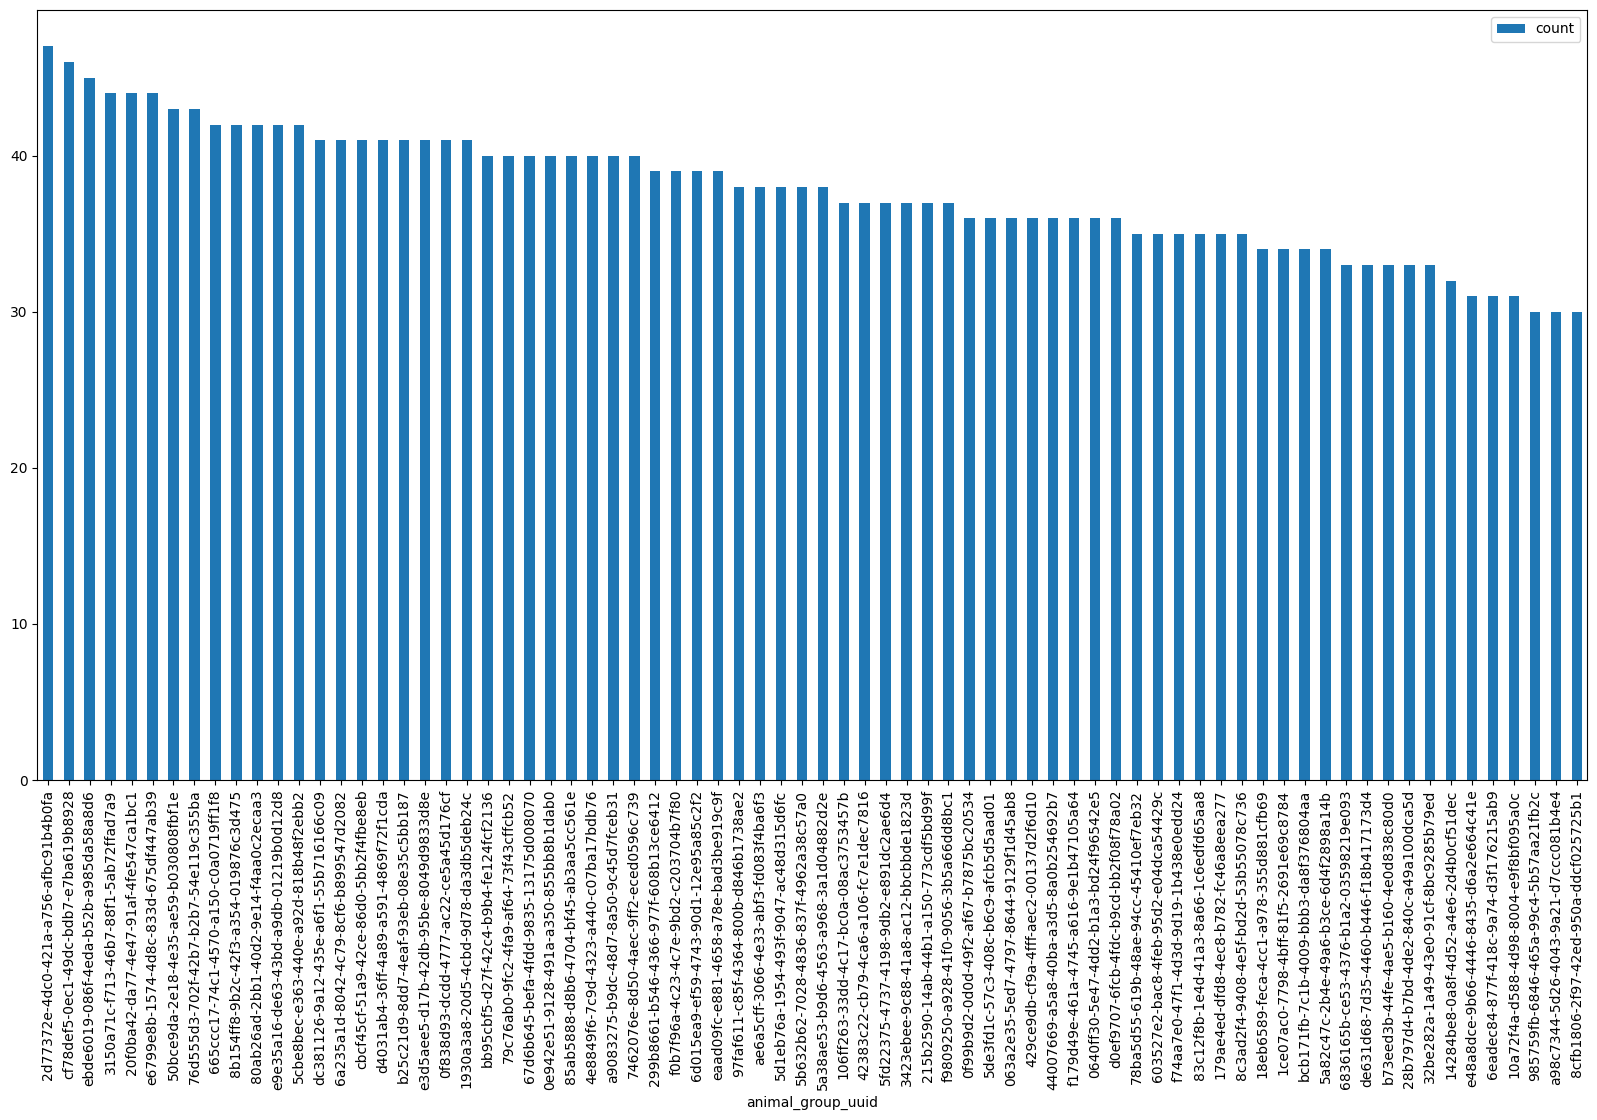

In [8]:
# plotar um grafico de barras com os valores de animal_group_uuid e sua repetiçoes
df_animal_group_uuid.plot.bar(x='animal_group_uuid', y='count', figsize=(20, 10))

In [54]:
# selecionar todas as datas de um animal_group_uuid especifico
df_lote = df[df['animal_group_uuid'] == '8cfb1806-2f97-42ed-950a-ddcf025725b1']
df_lote


,reference_date,holding_uuid,farm_uuid,animal_group_uuid,animal_group_age,total_measurement_weight,total_animal_measurement,balance_animals_stock_accumulated,diff_age
128936,2022-11-10,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,60bad4d6-9ba6-45e2-9104-3d156855a7c6,8cfb1806-2f97-42ed-950a-ddcf025725b1,7,0.197,1,23000,NaN
128937,2022-11-11,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,60bad4d6-9ba6-45e2-9104-3d156855a7c6,8cfb1806-2f97-42ed-950a-ddcf025725b1,8,0.251,1,23000,1.0
128938,2022-11-12,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,60bad4d6-9ba6-45e2-9104-3d156855a7c6,8cfb1806-2f97-42ed-950a-ddcf025725b1,9,0.276,1,23000,1.0
128939,2022-11-13,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,60bad4d6-9ba6-45e2-9104-3d156855a7c6,8cfb1806-2f97-42ed-950a-ddcf025725b1,10,0.309,1,23000,1.0
128940,2022-11-14,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,60bad4d6-9ba6-45e2-9104-3d156855a7c6,8cfb1806-2f97-42ed-950a-ddcf025725b1,11,0.355,1,23000,1.0
128941,2022-11-16,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,60bad4d6-9ba6-45e2-9104-3d156855a7c6,8cfb1806-2f97-42ed-950a-ddcf025725b1,13,0.469,1,23000,2.0
128942,2022-11-17,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,60bad4d6-9ba6-45e2-9104-3d156855a7c6,8cfb1806-2f97-42ed-950a-ddcf025725b1,14,1.037,2,23000,1.0
128943,2022-11-18,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,60bad4d6-9ba6-45e2-9104-3d156855a7c6,8cfb1806-2f97-42ed-950a-ddcf025725b1,15,0.567,1,23000,1.0
128944,2022-11-19,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,60bad4d6-9ba6-45e2-9104-3d156855a7c6,8cfb1806-2f97-42ed-950a-ddcf025725b1,16,0.639,1,23000,1.0
128945,2022-11-20,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,60bad4d6-9ba6-45e2-9104-3d156855a7c6,8cfb1806-2f97-42ed-950a-ddcf025725b1,17,0.702,1,23000,1.0


In [29]:
df_lote = df[df['animal_group_uuid'] == '8cfb1806-2f97-42ed-950a-ddcf025725b1']
df_lote

,reference_date,holding_uuid,farm_uuid,animal_group_uuid,animal_group_age,total_measurement_weight,total_animal_measurement,balance_animals_stock_accumulated,diff_age
128936,2022-11-10,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,60bad4d6-9ba6-45e2-9104-3d156855a7c6,8cfb1806-2f97-42ed-950a-ddcf025725b1,7,0.197,1,23000,NaN
128937,2022-11-11,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,60bad4d6-9ba6-45e2-9104-3d156855a7c6,8cfb1806-2f97-42ed-950a-ddcf025725b1,8,0.251,1,23000,1.0
128938,2022-11-12,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,60bad4d6-9ba6-45e2-9104-3d156855a7c6,8cfb1806-2f97-42ed-950a-ddcf025725b1,9,0.276,1,23000,1.0
128939,2022-11-13,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,60bad4d6-9ba6-45e2-9104-3d156855a7c6,8cfb1806-2f97-42ed-950a-ddcf025725b1,10,0.309,1,23000,1.0
128940,2022-11-14,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,60bad4d6-9ba6-45e2-9104-3d156855a7c6,8cfb1806-2f97-42ed-950a-ddcf025725b1,11,0.355,1,23000,1.0
128941,2022-11-16,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,60bad4d6-9ba6-45e2-9104-3d156855a7c6,8cfb1806-2f97-42ed-950a-ddcf025725b1,13,0.469,1,23000,2.0
128942,2022-11-17,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,60bad4d6-9ba6-45e2-9104-3d156855a7c6,8cfb1806-2f97-42ed-950a-ddcf025725b1,14,1.037,2,23000,1.0
128943,2022-11-18,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,60bad4d6-9ba6-45e2-9104-3d156855a7c6,8cfb1806-2f97-42ed-950a-ddcf025725b1,15,0.567,1,23000,1.0
128944,2022-11-19,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,60bad4d6-9ba6-45e2-9104-3d156855a7c6,8cfb1806-2f97-42ed-950a-ddcf025725b1,16,0.639,1,23000,1.0
128945,2022-11-20,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,60bad4d6-9ba6-45e2-9104-3d156855a7c6,8cfb1806-2f97-42ed-950a-ddcf025725b1,17,0.702,1,23000,1.0


In [10]:
# Suponhamos que 'data' seja o seu DataFrame com os dados
# Certifique-se de que 'reference_date' seja um objeto datetime

# Ordenar o DataFrame por 'farm_uuid', 'animal_group_uuid' e 'reference_date'
df.sort_values(by=['farm_uuid', 'animal_group_uuid', 'reference_date'], inplace=True)

# Calcular a diferença de idade entre as entradas de pesagem
# df.groupby(['farm_uuid', 'animal_group_uuid']) Cria a combinação unica de farm_uuid e animal_group_uuid
# ['animal_group_age'].diff() calcula a diferença de idade pra cada grupo
df['diff_age'] = df.groupby(['farm_uuid', 'animal_group_uuid'])['animal_group_age'].diff()

# Verificar se a diferença de idade é sempre igual a 1
lotes_variacao_1_dia = df[df['diff_age'] == 1]['animal_group_uuid'].nunique()

print(f"Número de lotes com variação de 1 em 1 dia: {lotes_variacao_1_dia}")


Número de lotes com variação de 1 em 1 dia: 234


In [11]:
df['diff_age']

90717    NaN
90718    7.0
90719    7.0
90720    7.0
90721    7.0
        ... 
90712    7.0
90713    7.0
90714    7.0
90715    7.0
90716    7.0
Name: diff_age, Length: 131655, dtype: float64

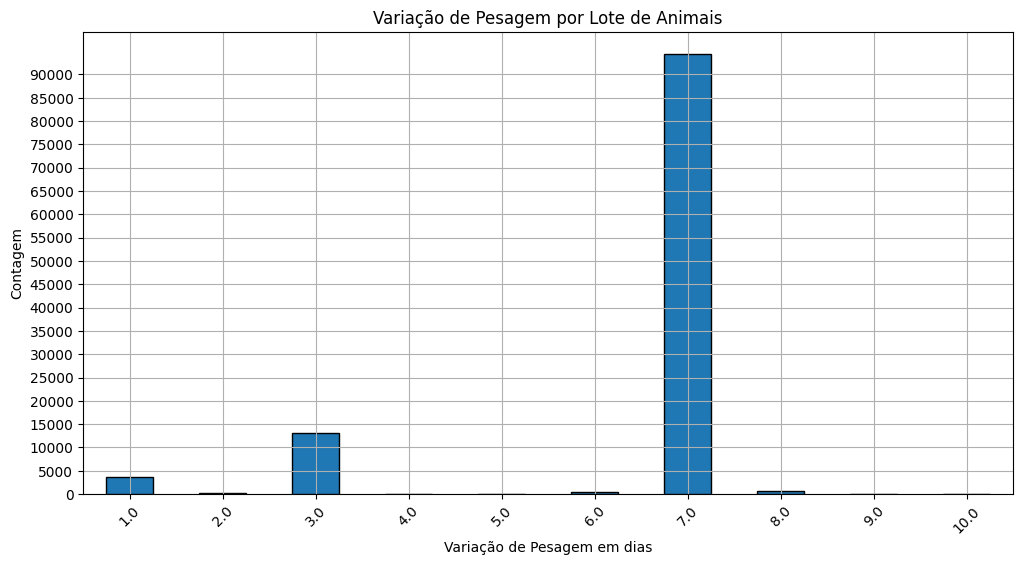

In [12]:
df_filtered = df[(df['diff_age'] >= 1) & (df['diff_age'] <= 10)]

# Criar um histograma das variações de idade por lote de animais
plt.figure(figsize=(12, 6))

#  df_filtered['diff_age'].value_counts() conta quantas vezes cada valor aparece, no caso diff_age
#  sort_index() ordem crescente dos valores do index
#  plot(kind='bar') cria um grafico de barras   
#  edgecolor='k' cria uma borda preta em volta das barras
ax = df_filtered['diff_age'].value_counts().sort_index().plot(kind='bar', edgecolor='k')

# Definir os rótulos (ticks) do eixo x , y e titulo
plt.xlabel('Variação de Pesagem em dias')
plt.ylabel('Contagem')
plt.title('Variação de Pesagem por Lote de Animais')

# Definir os rótulos (ticks) do eixo y para mostrar de 5k em 5k
# np.arange(0, df_filtered['diff_age'].value_counts().max() + 1, 5000) gera uma sequência de números 
# começando em 0, indo até o valor máximo da contagem de variação de idade em incrementos de 5000. 
# Isso é usado para definir os rótulos no eixo y.

y_ticks = np.arange(0, df_filtered['diff_age'].value_counts().max() + 1, 5000)
ax.set_yticks(y_ticks)

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
df

,reference_date,holding_uuid,farm_uuid,animal_group_uuid,animal_group_age,total_measurement_weight,total_animal_measurement,balance_animals_stock_accumulated,diff_age
90717,2019-01-27,b34b351a-b658-495d-9139-b9edd6c3f6dc,0004c280-2aac-4f34-a378-3ceffc23584a,0b313f33-b1e9-4621-b92f-d679afae423c,7,5377.000,28300,27913,NaN
90718,2019-02-03,b34b351a-b658-495d-9139-b9edd6c3f6dc,0004c280-2aac-4f34-a378-3ceffc23584a,0b313f33-b1e9-4621-b92f-d679afae423c,14,11886.000,28300,27913,7.0
90719,2019-02-10,b34b351a-b658-495d-9139-b9edd6c3f6dc,0004c280-2aac-4f34-a378-3ceffc23584a,0b313f33-b1e9-4621-b92f-d679afae423c,21,26319.000,28300,27913,7.0
90720,2019-02-17,b34b351a-b658-495d-9139-b9edd6c3f6dc,0004c280-2aac-4f34-a378-3ceffc23584a,0b313f33-b1e9-4621-b92f-d679afae423c,28,41884.000,28300,27913,7.0
90721,2019-02-24,b34b351a-b658-495d-9139-b9edd6c3f6dc,0004c280-2aac-4f34-a378-3ceffc23584a,0b313f33-b1e9-4621-b92f-d679afae423c,35,61694.000,28300,27913,7.0
...,...,...,...,...,...,...,...,...,...
90712,2022-04-26,071c638d-bb9b-4e68-a5d1-416da57d887f,fffa74b7-6607-4b65-abbe-007654f88751,ffb49663-f676-4f31-9f9c-00c9e6e939ca,13,0.520,1,19989,7.0
90713,2022-05-03,071c638d-bb9b-4e68-a5d1-416da57d887f,fffa74b7-6607-4b65-abbe-007654f88751,ffb49663-f676-4f31-9f9c-00c9e6e939ca,20,1.040,1,19989,7.0
90714,2022-05-10,071c638d-bb9b-4e68-a5d1-416da57d887f,fffa74b7-6607-4b65-abbe-007654f88751,ffb49663-f676-4f31-9f9c-00c9e6e939ca,27,1.728,1,19989,7.0
90715,2022-05-17,071c638d-bb9b-4e68-a5d1-416da57d887f,fffa74b7-6607-4b65-abbe-007654f88751,ffb49663-f676-4f31-9f9c-00c9e6e939ca,34,2.511,1,19989,7.0


In [13]:
duplicata = df[df.duplicated(subset=['animal_group_uuid', 'diff_age'], keep='first')]
selecao = df[~df.index.isin(duplicata.index)]
selecao

,reference_date,holding_uuid,farm_uuid,animal_group_uuid,animal_group_age,total_measurement_weight,total_animal_measurement,balance_animals_stock_accumulated,diff_age
90717,2019-01-27,b34b351a-b658-495d-9139-b9edd6c3f6dc,0004c280-2aac-4f34-a378-3ceffc23584a,0b313f33-b1e9-4621-b92f-d679afae423c,7,5377.000,28300,27913,NaN
90718,2019-02-03,b34b351a-b658-495d-9139-b9edd6c3f6dc,0004c280-2aac-4f34-a378-3ceffc23584a,0b313f33-b1e9-4621-b92f-d679afae423c,14,11886.000,28300,27913,7.0
90724,2020-10-07,b34b351a-b658-495d-9139-b9edd6c3f6dc,0004c280-2aac-4f34-a378-3ceffc23584a,1cf8462c-683a-4639-8782-4e6a97aa5ae4,7,12555.595,27951,27900,NaN
90725,2020-10-14,b34b351a-b658-495d-9139-b9edd6c3f6dc,0004c280-2aac-4f34-a378-3ceffc23584a,1cf8462c-683a-4639-8782-4e6a97aa5ae4,14,9486.680,27951,27900,7.0
90730,2018-01-23,b34b351a-b658-495d-9139-b9edd6c3f6dc,0004c280-2aac-4f34-a378-3ceffc23584a,1e6e69e8-ea75-4a84-b374-3eb3d7f2e309,7,5415.000,28500,28176,NaN
...,...,...,...,...,...,...,...,...,...
90704,2022-02-19,071c638d-bb9b-4e68-a5d1-416da57d887f,fffa74b7-6607-4b65-abbe-007654f88751,fd34d9fd-6236-401a-9d86-64356722dab8,6,0.182,1,19993,3.0
90705,2022-02-26,071c638d-bb9b-4e68-a5d1-416da57d887f,fffa74b7-6607-4b65-abbe-007654f88751,fd34d9fd-6236-401a-9d86-64356722dab8,13,0.480,1,19993,7.0
90710,2022-04-16,071c638d-bb9b-4e68-a5d1-416da57d887f,fffa74b7-6607-4b65-abbe-007654f88751,ffb49663-f676-4f31-9f9c-00c9e6e939ca,3,0.112,1,19989,NaN
90711,2022-04-19,071c638d-bb9b-4e68-a5d1-416da57d887f,fffa74b7-6607-4b65-abbe-007654f88751,ffb49663-f676-4f31-9f9c-00c9e6e939ca,6,0.197,1,19989,3.0


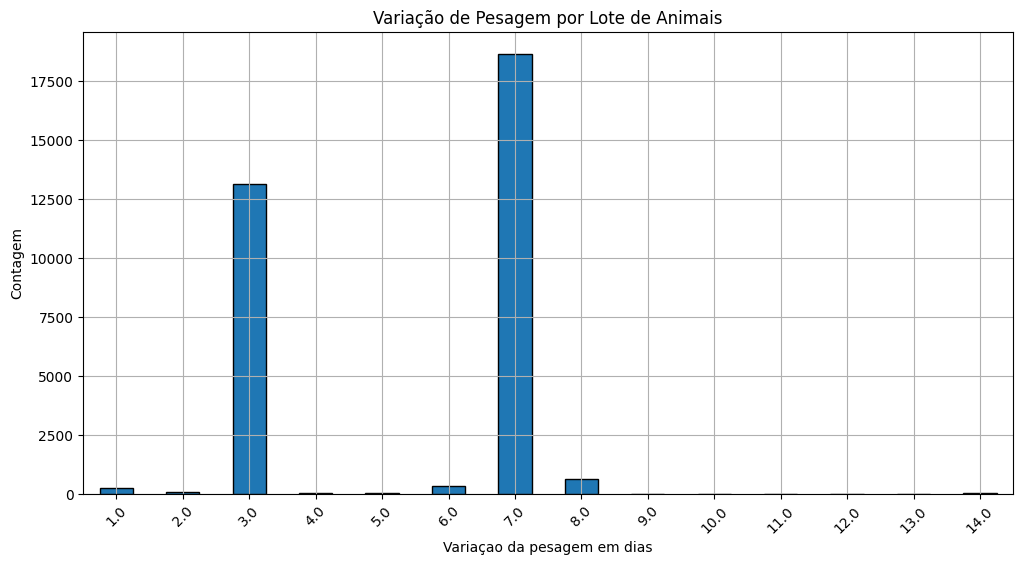

In [24]:
selecao = selecao[(selecao['diff_age'] >= 1) & (selecao['diff_age'] <= 14)]
plt.figure(figsize=(12,6))
graf = selecao['diff_age'].value_counts().sort_index().plot(kind='bar', edgecolor='k')
plt.xlabel('Variaçao da pesagem em dias')
plt.ylabel('Contagem')
plt.title('Variação de Pesagem por Lote de Animais')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [25]:
selecao

,reference_date,holding_uuid,farm_uuid,animal_group_uuid,animal_group_age,total_measurement_weight,total_animal_measurement,balance_animals_stock_accumulated,diff_age
90718,2019-02-03,b34b351a-b658-495d-9139-b9edd6c3f6dc,0004c280-2aac-4f34-a378-3ceffc23584a,0b313f33-b1e9-4621-b92f-d679afae423c,14,11886.000,28300,27913,7.0
90725,2020-10-14,b34b351a-b658-495d-9139-b9edd6c3f6dc,0004c280-2aac-4f34-a378-3ceffc23584a,1cf8462c-683a-4639-8782-4e6a97aa5ae4,14,9486.680,27951,27900,7.0
90731,2018-01-30,b34b351a-b658-495d-9139-b9edd6c3f6dc,0004c280-2aac-4f34-a378-3ceffc23584a,1e6e69e8-ea75-4a84-b374-3eb3d7f2e309,14,13965.000,28500,28176,7.0
90736,2018-03-06,b34b351a-b658-495d-9139-b9edd6c3f6dc,0004c280-2aac-4f34-a378-3ceffc23584a,1e6e69e8-ea75-4a84-b374-3eb3d7f2e309,50,76950.000,28500,28176,8.0
90738,2020-12-17,b34b351a-b658-495d-9139-b9edd6c3f6dc,0004c280-2aac-4f34-a378-3ceffc23584a,271fcf50-c69f-4f35-a78b-c5a34ed6b5cc,14,0.420,1,28100,7.0
...,...,...,...,...,...,...,...,...,...
90700,2021-06-07,071c638d-bb9b-4e68-a5d1-416da57d887f,fffa74b7-6607-4b65-abbe-007654f88751,fd26e781-6452-4d5a-806d-661053c97fb1,28,1.479,1,21000,14.0
90704,2022-02-19,071c638d-bb9b-4e68-a5d1-416da57d887f,fffa74b7-6607-4b65-abbe-007654f88751,fd34d9fd-6236-401a-9d86-64356722dab8,6,0.182,1,19993,3.0
90705,2022-02-26,071c638d-bb9b-4e68-a5d1-416da57d887f,fffa74b7-6607-4b65-abbe-007654f88751,fd34d9fd-6236-401a-9d86-64356722dab8,13,0.480,1,19993,7.0
90711,2022-04-19,071c638d-bb9b-4e68-a5d1-416da57d887f,fffa74b7-6607-4b65-abbe-007654f88751,ffb49663-f676-4f31-9f9c-00c9e6e939ca,6,0.197,1,19989,3.0


In [26]:
# lotes
selecao['animal_group_uuid'].nunique()

18870

In [76]:
# fazendas
selecao['farm_uuid'].nunique()

572

In [77]:
selecao['holding_uuid'].nunique()   

5

In [78]:
#salvar em um novo dataframe lotes que possuem pesagem de 1 em 1 dia 
df_variation_one = selecao[selecao['diff_age'] == 1]    
df_variation_one.count()[0]

234

In [79]:
df_variation_three = selecao[selecao['diff_age'] == 3]
df_variation_three.count()[0]

13121

In [80]:
df_variation_seven = selecao[selecao['diff_age'] == 7]
df_variation_seven.count()[0]

18643

In [81]:

df_variation_eight = selecao[(selecao['diff_age'] == 8) ]
df_variation_eight.count()[0]

624

In [82]:
df_variation_six = selecao[(selecao['diff_age'] == 6) ]
df_variation_six.count()[0]

350

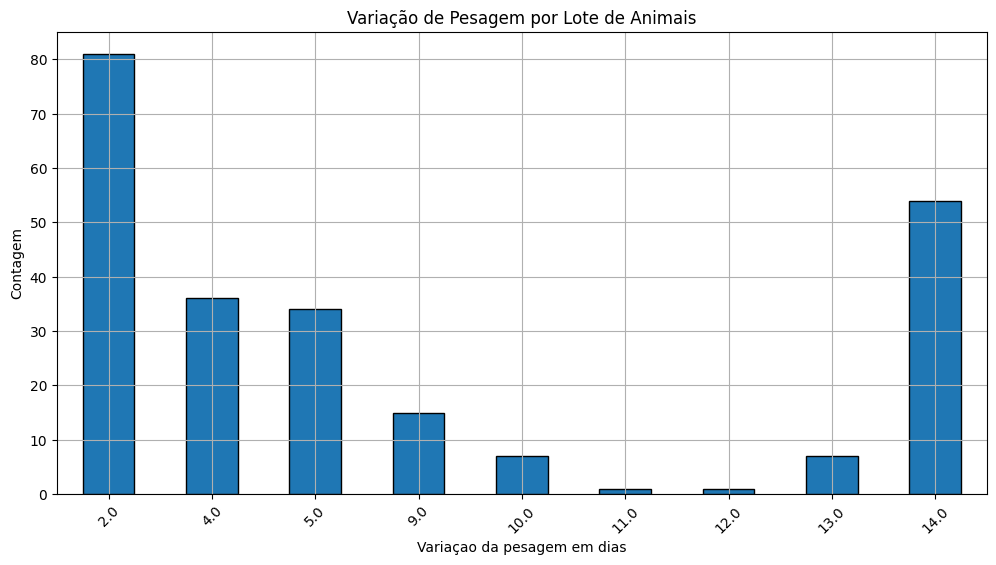

In [27]:
#salvar em um novo dataframe lotes que possuem pesagem de diferentes de 1, 3, 7, 8 e 6 dias 
df_variation_other = selecao[(selecao['diff_age'] != 1) & (selecao['diff_age'] != 3) & (selecao['diff_age'] != 7) & (selecao['diff_age'] != 8) & (selecao['diff_age'] != 6)]
df_variation_other.count()[0]
#plot.map de todas as diferencas de pesagem	e frequencia delas
plt.figure(figsize=(12,6))
graf = df_variation_other['diff_age'].value_counts().sort_index().plot(kind='bar', edgecolor='k')
plt.xlabel('Variaçao da pesagem em dias')
plt.ylabel('Contagem')
plt.title('Variação de Pesagem por Lote de Animais')
plt.xticks(rotation=45) 
plt.grid(True)


In [40]:
df_novo = df_lot_info.merge(df[['animal_group_uuid', 'diff_age']], 
                            left_on='uuid', 
                            right_on='animal_group_uuid', 
                            how='left')

# Exclua a coluna animal_group_uuid do DataFrame resultante, se desejado
df_novo = df_novo.drop(columns=['animal_group_uuid'])
df_novo

,uuid,incoming_date,outgoing_date,input_total,input_weight,input_weight_total,output_total,output_age,output_age_total,output_weight,...,weight_gain_daily,weight_avg_by_age,feed_conversion_ratio,feed_conversion_ratio_adj,balance,deaths,mortality,density_stocking,europe_efficience_index,diff_age
0,04ef96f7-f110-469d-a685-2f45708ae94b,2021-02-06,2021-03-24,19600.0,0.04742,929.432,18992,45.281250,8.599815e+05,2.798547,...,42.0,1.401259,2.005738,2.100198,19600.0,513.0,2.617347,0.133333,298.575718,NaN
1,04ef96f7-f110-469d-a685-2f45708ae94b,2021-02-06,2021-03-24,19600.0,0.04742,929.432,18992,45.281250,8.599815e+05,2.798547,...,42.0,1.401259,2.005738,2.100198,19600.0,513.0,2.617347,0.133333,298.575718,3.0
2,04ef96f7-f110-469d-a685-2f45708ae94b,2021-02-06,2021-03-24,19600.0,0.04742,929.432,18992,45.281250,8.599815e+05,2.798547,...,42.0,1.401259,2.005738,2.100198,19600.0,513.0,2.617347,0.133333,298.575718,7.0
3,04ef96f7-f110-469d-a685-2f45708ae94b,2021-02-06,2021-03-24,19600.0,0.04742,929.432,18992,45.281250,8.599815e+05,2.798547,...,42.0,1.401259,2.005738,2.100198,19600.0,513.0,2.617347,0.133333,298.575718,7.0
4,04ef96f7-f110-469d-a685-2f45708ae94b,2021-02-06,2021-03-24,19600.0,0.04742,929.432,18992,45.281250,8.599815e+05,2.798547,...,42.0,1.401259,2.005738,2.100198,19600.0,513.0,2.617347,0.133333,298.575718,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125820,e68a2882-a594-446a-9122-ce73dc900a56,2022-07-12,2022-08-26,34000.0,0.04200,1428.000,31482,44.416667,1.398326e+06,3.142431,...,42.0,1.532536,1.725361,1.738907,34000.0,2194.0,6.452941,0.307971,379.684668,7.0
125821,40202c2a-a618-4415-bca5-06b2ceeb3827,2021-10-21,2021-12-06,32200.0,0.03800,1223.600,30660,46.000000,1.410360e+06,3.137965,...,42.0,1.550010,1.769546,1.784142,32200.0,1325.0,4.114907,1.341667,367.066463,NaN
125822,46598bfa-38a9-4604-b812-114cea9e4bba,2021-08-14,2021-10-01,31400.0,0.04600,1444.400,30440,48.000000,1.461120e+06,3.435611,...,42.0,1.714495,1.869593,1.814155,31400.0,940.0,2.993631,0.817708,371.134014,NaN
125823,47c980bb-ec67-4768-9779-1f19dee57c4f,2021-12-23,2022-02-08,31000.0,0.04100,1271.000,30058,47.000000,1.412726e+06,3.611019,...,42.0,1.798470,1.696950,1.600240,31000.0,973.0,3.138710,1.291667,438.996551,NaN


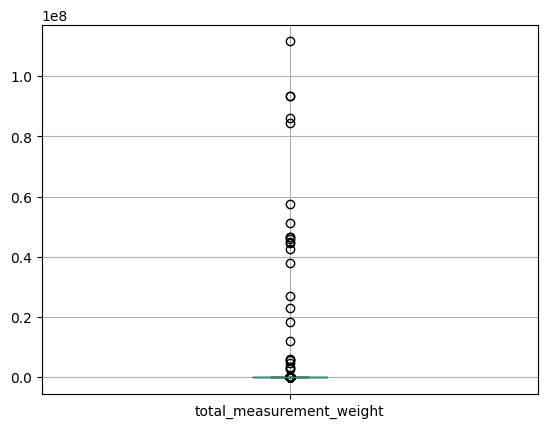

In [10]:
total_weight = df[['total_measurement_weight']]
total_weight.boxplot()
plt.show()


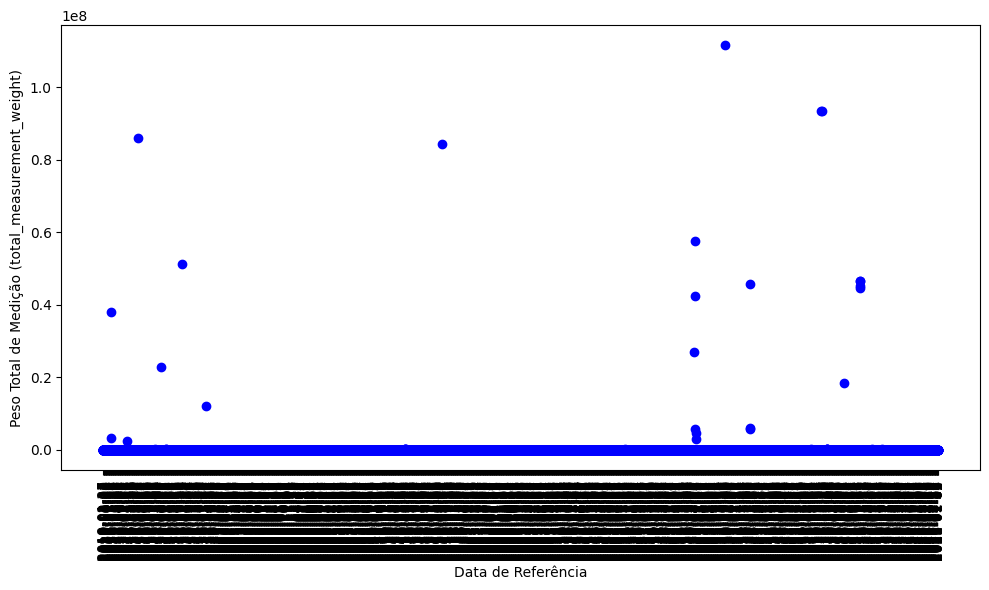

In [59]:
# Configure o tamanho da figura
plt.figure(figsize=(10, 6))

# Plote o gráfico de dispersão
plt.scatter(df['reference_date'], df['total_measurement_weight'], marker='o', color='blue')
plt.xlabel('Data de Referência')
plt.ylabel('Peso Total de Medição (total_measurement_weight)')

# Rotacione os rótulos do eixo x para exibi-los na vertical
plt.xticks(rotation=90)

# Mostra o gráfico
plt.tight_layout()
plt.show()

<Axes: >

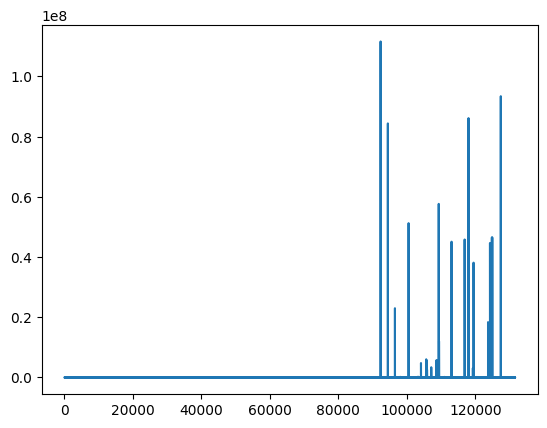

In [14]:
df['total_measurement_weight'].plot()


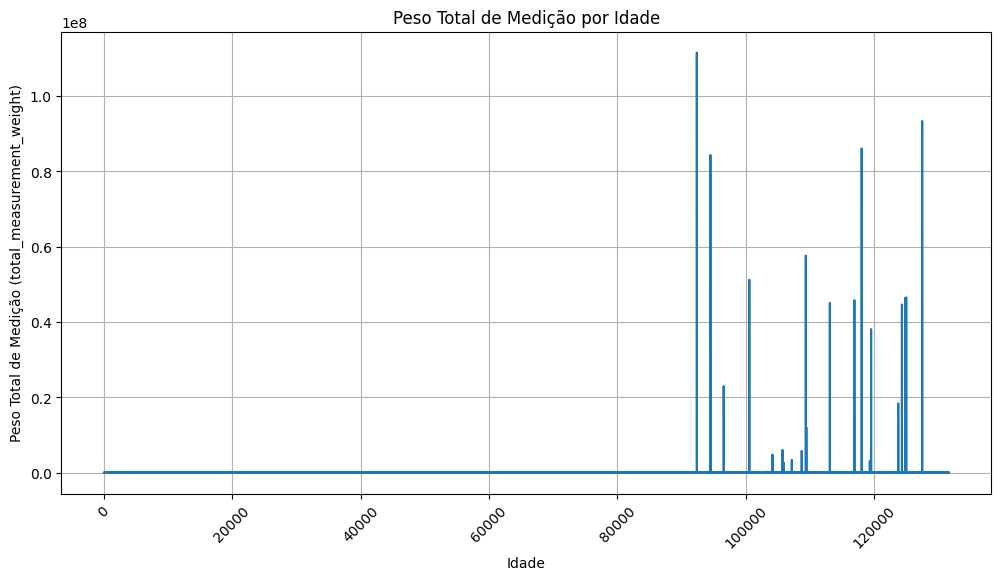

In [26]:
#plotar grafico total_measurement_weight por maximo de idade
plt.figure(figsize=(12,6))
graf = df['total_measurement_weight'].plot()
plt.xlabel('Idade')
plt.ylabel('Peso Total de Medição (total_measurement_weight)')
plt.title('Peso Total de Medição por Idade')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<Axes: xlabel='animal_group_age', ylabel='total_measurement_weight'>

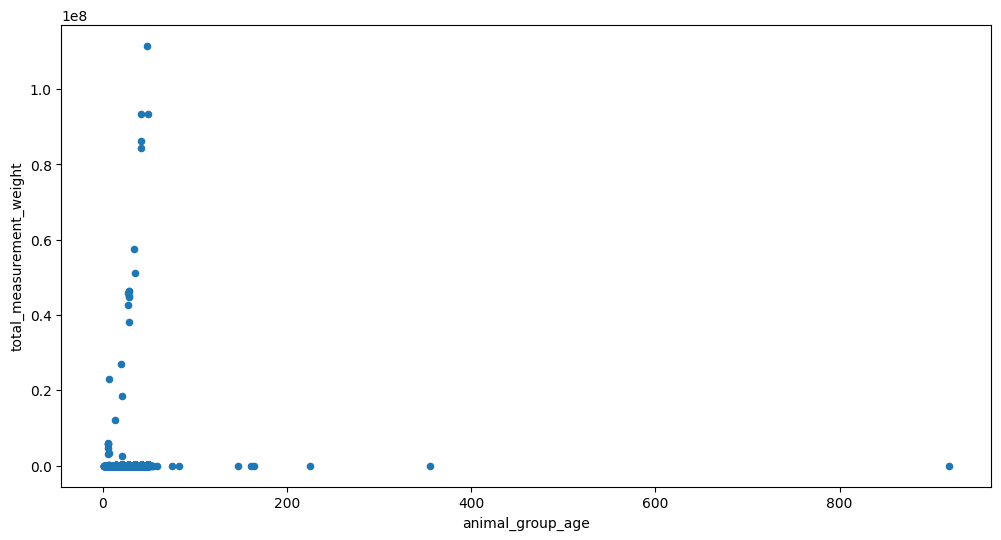

In [27]:
df.plot.scatter(x='animal_group_age', y='total_measurement_weight', figsize=(12, 6))

Text(0, 0.5, 'Peso Total de Medição em Kg')

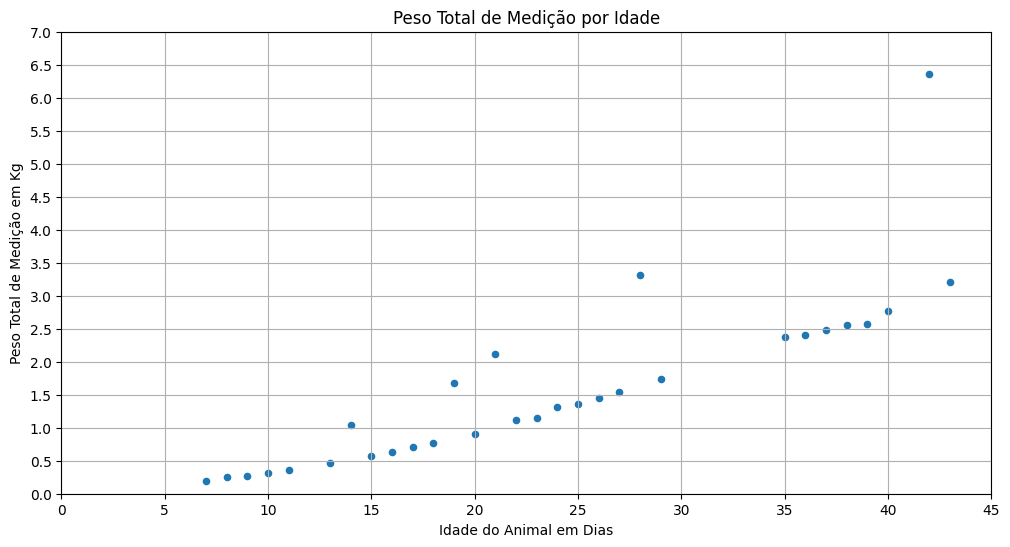

In [19]:
df_id = df[df['animal_group_uuid'] == '8cfb1806-2f97-42ed-950a-ddcf025725b1']
df_id.plot.scatter(x='animal_group_age', y='total_measurement_weight', figsize=(12, 6))
#definirlimite de x ate 45
plt.xlim(0, 45)
#definir limite de y ate 7
plt.ylim(0, 7)
# variar y de 0.5 em  0.5
plt.yticks(np.arange(0, 7.5, 0.5))
# colocar grid no grafico
plt.grid(True)
#definir titulo do grafico
plt.title('Peso Total de Medição por Idade')
#definir nome dos eixos
plt.xlabel('Idade do Animal em Dias')
plt.ylabel('Peso Total de Medição em Kg')


<Axes: xlabel='animal_group_age', ylabel='total_measurement_weight'>

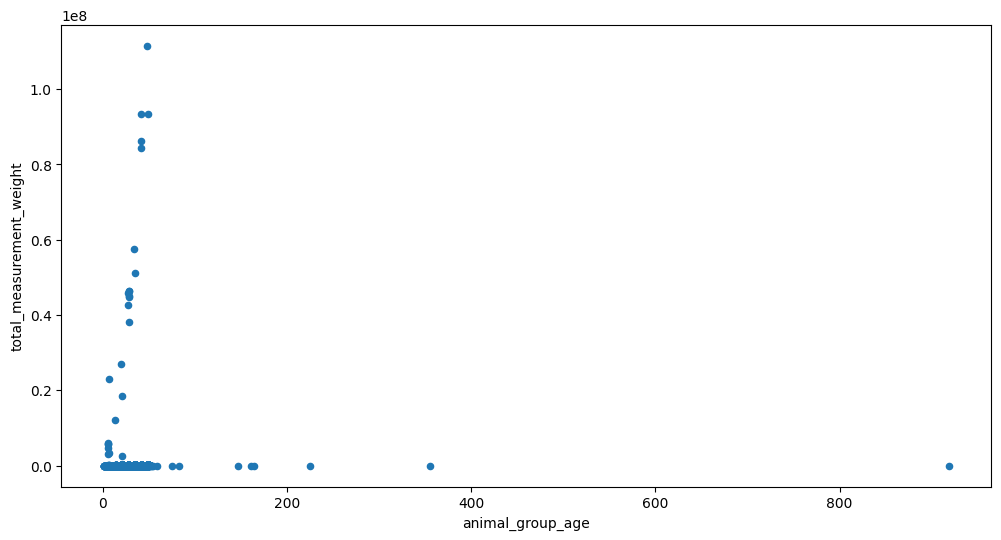

In [14]:
df.plot.scatter(x='animal_group_age', y='total_measurement_weight', figsize=(12, 6))

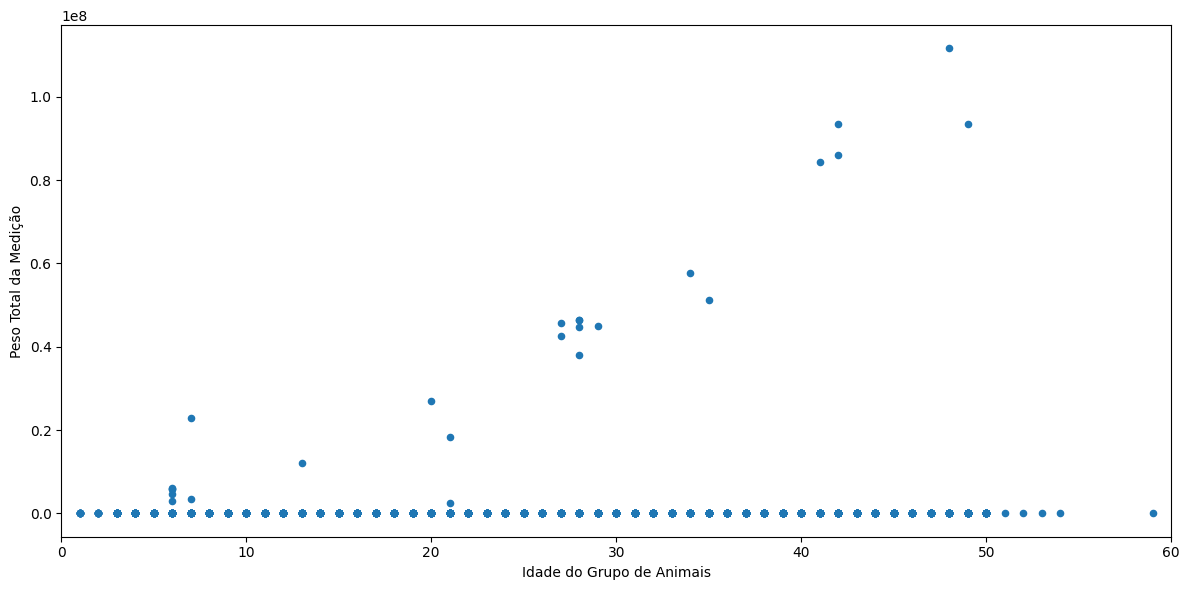

In [27]:
ax = df.plot.scatter(x='animal_group_age', y='total_measurement_weight', figsize=(12, 6))

# Defina os limites do eixo x para variar até 45
ax.set_xlim(0, 60)

# Configure o título dos eixos
plt.xlabel('Idade do Grupo de Animais')
plt.ylabel('Peso Total da Medição')

# Mostra o gráfico
plt.tight_layout()
plt.show()

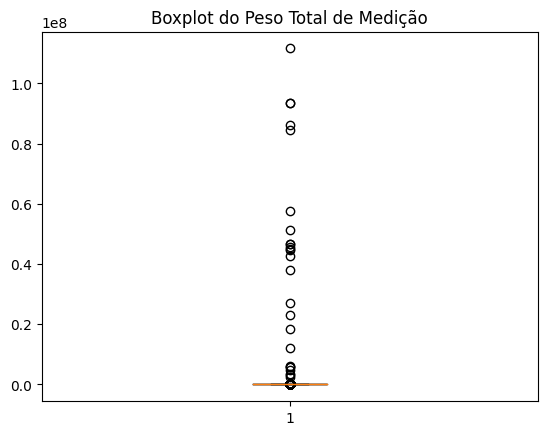

In [28]:
plt.boxplot(df['total_measurement_weight'])
plt.title('Boxplot do Peso Total de Medição')
plt.show()

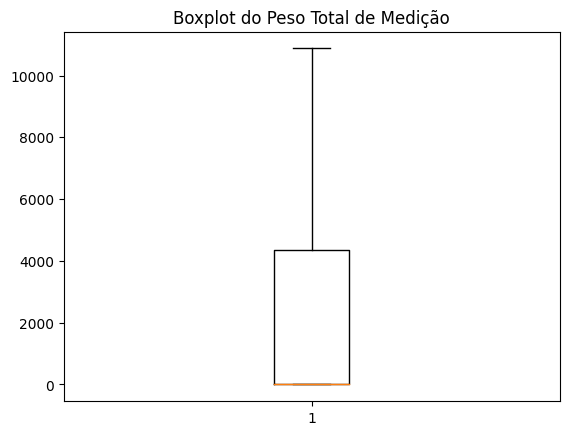

In [29]:
plt.boxplot(df['total_measurement_weight'], showfliers=False)
plt.title('Boxplot do Peso Total de Medição')
plt.show()

Text(0.5, 1.0, 'Histograma de Total Measurement Weight')

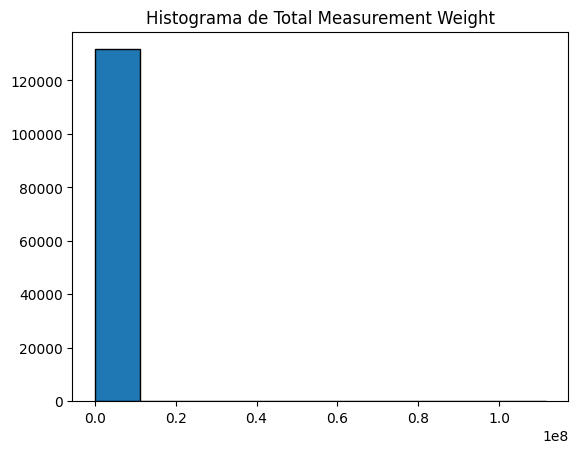

In [39]:
plt.hist(df['total_measurement_weight'], bins=10, edgecolor='black')

# Adicione um título e rótulos de eixo
plt.title('Histograma de Total Measurement Weight')

Text(0.5, 1.0, 'Histograma de Total Measurement Weight')

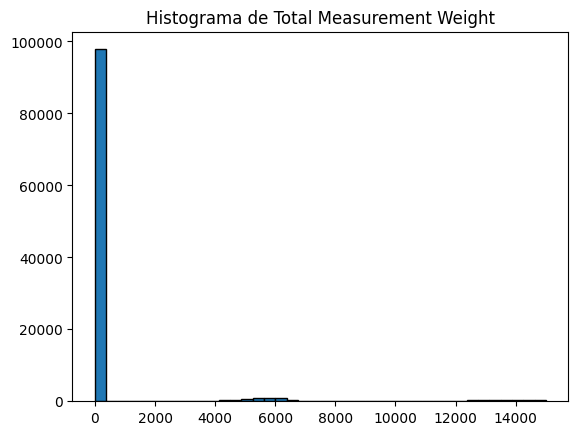

In [9]:
plt.hist(df['total_measurement_weight'], bins=40, range=(0,15000), edgecolor='black')

# Adicione um título e rótulos de eixo
plt.title('Histograma de Total Measurement Weight')

In [45]:
df_filtrado = df[(df['total_measurement_weight'] > 4000) & (df['total_measurement_weight'] < 10000)]
df_filtrado

,reference_date,holding_uuid,farm_uuid,animal_group_uuid,animal_group_age,total_measurement_weight,total_animal_measurement,balance_animals_stock_accumulated
74366,2022-05-18,071c638d-bb9b-4e68-a5d1-416da57d887f,db6d2d90-7815-4da4-b49f-bb8b53ebf332,43a6a226-bd0a-4433-aa8b-e6318c347611,35,6260.88,2400,32000
74889,2022-05-18,071c638d-bb9b-4e68-a5d1-416da57d887f,db6d2d90-7815-4da4-b49f-bb8b53ebf332,b28b754f-b5d8-43c7-8e31-e8719edbb4c8,35,6273.12,2400,32000
75108,2022-05-18,071c638d-bb9b-4e68-a5d1-416da57d887f,db6d2d90-7815-4da4-b49f-bb8b53ebf332,d88ba809-06f3-4146-b318-1a6296206255,35,6812.10,3000,33000
90717,2019-01-27,b34b351a-b658-495d-9139-b9edd6c3f6dc,0004c280-2aac-4f34-a378-3ceffc23584a,0b313f33-b1e9-4621-b92f-d679afae423c,7,5377.00,28300,27913
90725,2020-10-14,b34b351a-b658-495d-9139-b9edd6c3f6dc,0004c280-2aac-4f34-a378-3ceffc23584a,1cf8462c-683a-4639-8782-4e6a97aa5ae4,14,9486.68,27951,27900
...,...,...,...,...,...,...,...,...
127563,2019-08-09,b34b351a-b658-495d-9139-b9edd6c3f6dc,ffd9957f-e9a0-4a9d-b8cf-244c78d08743,c4086fe2-646c-4ecc-9890-8cd1c25a97b9,7,4800.00,30000,29545
127570,2020-08-01,b34b351a-b658-495d-9139-b9edd6c3f6dc,ffd9957f-e9a0-4a9d-b8cf-244c78d08743,cfa9cd1b-55de-41b0-9d83-b6ff9cc7c46a,6,5400.00,30000,29692
127576,2019-02-08,b34b351a-b658-495d-9139-b9edd6c3f6dc,ffd9957f-e9a0-4a9d-b8cf-244c78d08743,e1d1b2b0-5ff3-43ba-b347-6affda3e4f9a,6,5424.50,28550,28117
127583,2018-09-07,b34b351a-b658-495d-9139-b9edd6c3f6dc,ffd9957f-e9a0-4a9d-b8cf-244c78d08743,f50d57ca-fd3e-4a73-866b-88cd8f1da6dc,7,5453.00,28700,28027
